# Importing Required Library

In [270]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score

import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [212]:
import warnings
warnings.filterwarnings('ignore')

# Library Version

In [213]:
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("matplotlib.plt version={}".format(plt1.__version__))
#to add matplotlib version

Numpy version=1.24.3
Pandas version=1.3.4
Seaborn version=0.11.2
matplotlib.plt version=3.4.3


# Loading Data

In [266]:
df = pd.read_csv("data/iris.csv")

In [267]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [216]:
#About the Data

In [217]:
# These are a list of columns that include in the dataset
list(df.columns.values)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [218]:
#Explore continuous features
#Data Types and Summary Statistics

In [219]:
print('-'*50)
df.info()
print('-'*50)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
--------------------------------------------------


In [220]:
# Checking missing data in the dataset
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [221]:
# Summary statistics for the dataset
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Q1.Exploratory Data Analysis

#    Feature using Histogram

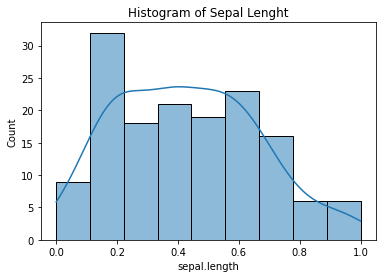

In [237]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='sepal.length', kde=True)
plt.xlabel('sepal.length')
plt.ylabel('Count')
plt.title(f'Histogram of Sepal Lenght')
plt.show()

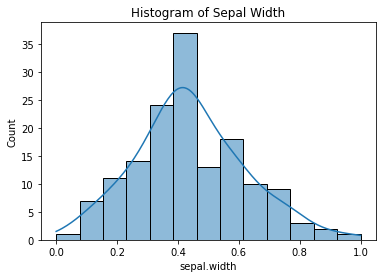

In [238]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='sepal.width', kde=True)
plt.xlabel('sepal.width')
plt.ylabel('Count')
plt.title(f'Histogram of Sepal Width')
plt.show()

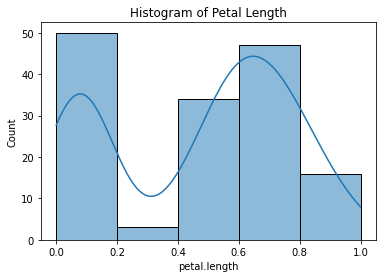

In [243]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='petal.length', kde=True, bins=5)
plt.xlabel('petal.length')
plt.ylabel('Count')
plt.title(f'Histogram of Petal Length')
plt.show()

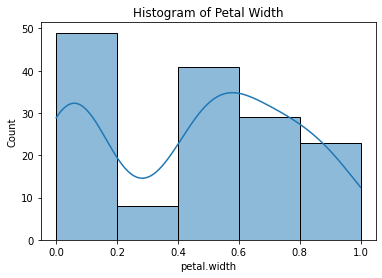

In [245]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='petal.width', kde=True, bins=5)
plt.xlabel('petal.width')
plt.ylabel('Count')
plt.title(f'Histogram of Petal Width')
plt.show()

# Q2. Encoding Target Variable

In [226]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.iloc[:,-1] = encoder.fit_transform(df.iloc[:,-1].values)

In [227]:
#Check how teh Species column has changed
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [228]:
#Scalling Data

In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Selecting the columns to scale.
feature_columns =['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
#Apply the scaler
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [230]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


## Splitting dataset (80:10:10) 

In [250]:
features

,sepal.length,sepal.width,petal.length,petal.width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [251]:
from sklearn.model_selection import train_test_split

labels = df['variety']
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns],labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [252]:
X_val.shape

(15, 4)

# KFold Cross Validation

In [278]:
k_models = []
k_models.append(RandomForestClassifier())
k_models.append(LogisticRegression())
k_models.append(SVC())

kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = []

for model in k_models:
    cv_scores.append(cross_val_score(model, X_train, y_train, cv=kf))

print(cv_scores)

[array([0.93333333, 0.93333333, 0.8       , 0.93333333, 1.        ,
       1.        ]), array([0.93333333, 0.86666667, 0.8       , 0.86666667, 1.        ,
       1.        ]), array([0.93333333, 0.93333333, 0.8       , 0.93333333, 1.        ,
       1.        ])]


# Grid Serch

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
df.head()

In [279]:
features = df[feature_columns]
labels = df[['variety']]

models = {}

# Random Forest Classifier

In [280]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)
models["RF"] = cv.best_estimator_

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.953 (+/-0.053) for {'max_depth': 2, 'n_estimators': 5}
0.947 (+/-0.068) for {'max_depth': 2, 'n_estimators': 50}
0.947 (+/-0.068) for {'max_depth': 2, 'n_estimators': 250}
0.96 (+/-0.065) for {'max_depth': 4, 'n_estimators': 5}
0.96 (+/-0.05) for {'max_depth': 4, 'n_estimators': 50}
0.967 (+/-0.042) for {'max_depth': 4, 'n_estimators': 250}
0.94 (+/-0.098) for {'max_depth': 8, 'n_estimators': 5}
0.953 (+/-0.068) for {'max_depth': 8, 'n_estimators': 50}
0.96 (+/-0.05) for {'max_depth': 8, 'n_estimators': 250}
0.947 (+/-0.08) for {'max_depth': 16, 'n_estimators': 5}
0.967 (+/-0.042) for {'max_depth': 16, 'n_estimators': 50}
0.967 (+/-0.042) for {'max_depth': 16, 'n_estimators': 250}
0.953 (+/-0.068) for {'max_depth': 32, 'n_estimators': 5}
0.967 (+/-0.042) for {'max_depth': 32, 'n_estimators': 50}
0.96 (+/-0.065) for {'max_depth': 32, 'n_estimators': 250}
0.933 (+/-0.094) for {'max_depth': None, 'n_estimators': 5}
0.967 (+/-0.042) for

### LogisticRegression

In [281]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)
models["LR"] = cv.best_estimator_

BEST PARAMS: {'C': 10}

0.74 (+/-0.088) for {'C': 0.001}
0.86 (+/-0.154) for {'C': 0.01}
0.947 (+/-0.09) for {'C': 0.1}
0.973 (+/-0.05) for {'C': 1}
0.98 (+/-0.053) for {'C': 10}
0.98 (+/-0.053) for {'C': 100}
0.973 (+/-0.065) for {'C': 1000}


### SVC

In [282]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)
models["SVC"] = cv.best_estimator_

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.973 (+/-0.027) for {'C': 0.1, 'kernel': 'linear'}
0.92 (+/-0.053) for {'C': 0.1, 'kernel': 'rbf'}
0.98 (+/-0.033) for {'C': 1, 'kernel': 'linear'}
0.967 (+/-0.042) for {'C': 1, 'kernel': 'rbf'}
0.973 (+/-0.078) for {'C': 10, 'kernel': 'linear'}
0.98 (+/-0.033) for {'C': 10, 'kernel': 'rbf'}


# Model Evaluation for (80:10:10)

In [283]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='micro'), 3)
    recall = round(recall_score(labels, pred, average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [285]:
for name, model in models.items():
    evaluate_model(name, model, features, labels)

RF -- Accuracy: 0.993 / Precision: 0.993 / Recall: 0.993 / Latency: 57.7ms
LR -- Accuracy: 0.98 / Precision: 0.98 / Recall: 0.98 / Latency: 1.5ms
SVC -- Accuracy: 0.993 / Precision: 0.993 / Recall: 0.993 / Latency: 2.0ms


### At results on Validation set and test set for (80:10:10),the best model is Logestic Regression because the accuracy is 0.98 with Latency 1.5ms. 


# Splitting dataset (60:20:20)

In [255]:
from sklearn.model_selection import train_test_split

labels = df['variety']

X_train, X_test, y_train, y_test = train_test_split(df[feature_columns],labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
y_val.shape

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [256]:
features = df[feature_columns]
labels = df[['variety']]

models = {}

# Random Forest Classifier

In [257]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)
models["RF"] = cv.best_estimator_

BEST PARAMS: {'max_depth': 4, 'n_estimators': 5}

0.96 (+/-0.065) for {'max_depth': 2, 'n_estimators': 5}
0.953 (+/-0.053) for {'max_depth': 2, 'n_estimators': 50}
0.953 (+/-0.068) for {'max_depth': 2, 'n_estimators': 250}
0.967 (+/-0.042) for {'max_depth': 4, 'n_estimators': 5}
0.967 (+/-0.042) for {'max_depth': 4, 'n_estimators': 50}
0.96 (+/-0.05) for {'max_depth': 4, 'n_estimators': 250}
0.947 (+/-0.08) for {'max_depth': 8, 'n_estimators': 5}
0.967 (+/-0.042) for {'max_depth': 8, 'n_estimators': 50}
0.967 (+/-0.042) for {'max_depth': 8, 'n_estimators': 250}
0.953 (+/-0.068) for {'max_depth': 16, 'n_estimators': 5}
0.967 (+/-0.042) for {'max_depth': 16, 'n_estimators': 50}
0.96 (+/-0.05) for {'max_depth': 16, 'n_estimators': 250}
0.953 (+/-0.068) for {'max_depth': 32, 'n_estimators': 5}
0.96 (+/-0.05) for {'max_depth': 32, 'n_estimators': 50}
0.96 (+/-0.05) for {'max_depth': 32, 'n_estimators': 250}
0.96 (+/-0.05) for {'max_depth': None, 'n_estimators': 5}
0.96 (+/-0.05) for {'max_d

# LogisticRegression

In [258]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)
models["LR"] = cv.best_estimator_

BEST PARAMS: {'C': 100}

0.753 (+/-0.1) for {'C': 0.001}
0.78 (+/-0.108) for {'C': 0.01}
0.867 (+/-0.146) for {'C': 0.1}
0.927 (+/-0.115) for {'C': 1}
0.953 (+/-0.068) for {'C': 10}
0.973 (+/-0.065) for {'C': 100}
0.973 (+/-0.065) for {'C': 1000}


# SVC

svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)
models["SVC"] = cv.best_estimator_

# Model Evaluation for (60:20:20)

In [261]:
for name, model in models.items():
    evaluate_model(name, model, features, labels)

RF -- Accuracy: 0.98 / Precision: 0.98 / Recall: 0.98 / Latency: 7.1ms
LR -- Accuracy: 0.98 / Precision: 0.98 / Recall: 0.98 / Latency: 1.8ms
SVC -- Accuracy: 0.98 / Precision: 0.98 / Recall: 0.98 / Latency: 2.6ms


### At results on Validation set and test set for (60:20:20),the best model is Logestic Regression because the accuracy is 0.98 with Latency 1.8ms.

### Comparing two split data ratio for (80:10:10) and (60:20:20), Logestic Regression is the best model with accuracy 0.98 while Latency is 1.5ms and 1.8ms.

In [262]:
pwd

'/Users/sandaraung/Documents/AI'